In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%aimport common

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [4]:
img_path = "/home/petr/Program files/Python_projects/Haugh/hough-circles-cvlab-master/img/Cars"
#img_path = "./img/Cars"

In [5]:
def show_image(img):
    if img is None:
        print('None!')
        return 
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [6]:
def load_img(path, n=None):
    fname = n or 1
    img = cv2.imread("%s/%d.jpg" % (path, fname))
    return fname, img

In [7]:
def wheelDetector(img, min_Rad, max_Rad, accumulatorThreshold, minDistance, paramKenny):
    gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    d = min(gimg.shape)
    
    circles = cv2.HoughCircles(gimg, cv2.HOUGH_GRADIENT, 1, minDist=minDistance,
                               param1=paramKenny,
                               param2=accumulatorThreshold, minRadius=min_Rad, maxRadius=max_Rad)
    
    if circles is None:
        return None, False
    timg = img.copy()
    hasCar = False
    for i in circles[0, :]:
        cv2.circle(timg, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(timg, (i[0], i[1]), 2, (0, 0, 255), 3)
        for j in circles[0, :]:
            if (abs(i[0] - j[0]) >= 50) and (abs(i[1] - j[1]) <= 75) and (abs(i[2] != j[2]) <= 10):
                hasCar = True
    
    return timg, hasCar

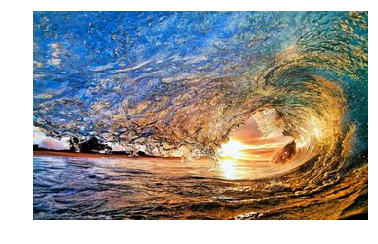

In [46]:
image_number = 100
_, img = load_img(img_path, image_number)
show_image(img)

In [45]:
bimg = cv2.blur(img, (5,5))
#for accThr in range(150, 50, -5):
minR = 120
maxR = 150
accThr = 150
minDist = 55
paramKenny = 170
hasCar = False
while (minR >= 0) and (not hasCar):
    while (accThr >=40) and (not hasCar) :   
        #show_image(foo2(img, minR, maxR, accThr))  
        while (paramKenny > 70) and (not hasCar):
            foo2_img, hasCar = wheelDetector(bimg, minR, maxR, accThr, minDist, paramKenny)
            paramKenny -=10
        accThr -= 5
        paramKenny = 150
    minR -= 5
    maxR -= 5
    accThr = 150
    
if hasCar:
    show_image(foo2_img)
    print("Car is here")
else:
    print("This image don't has car")

This image don't has car


In [560]:
#images: 10, 16, 18, 19, 20, 27, 30, 33, 38, 39, 41, 45, 46, 47, 49, 53, 54, 55, 56, 65, 66, 67
# 69, 72, 73, 77, 80, 82, 87, 91, 96